In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from copy import deepcopy


UNCLASSIFIED = False
NOISE = -1

In [2]:
#Task1

In [3]:
def _dist(p,q):
    # compute and return the euclidean distance
    # put your code here
    elu_dis=np.sqrt((p[0]-q[0])**2+(p[1]-q[1])**2)
    return elu_dis
    

In [4]:
#test
a=_dist([5.5,6.6],[14.0,2.5])
a

9.437160589923222

In [5]:
def _eps_neighborhood(p,q,eps):
    # check if the distance between p and q is below eps
    # return True or False
    # put your code here
    if _dist(p,q)<=eps:
        return True 
    else:
        return False

In [6]:
#test
b=_eps_neighborhood([5.5,6.6],[14.0,2.5],9)
print(b)
c=_eps_neighborhood([5.5,6.6],[14.0,2.5],10)
print(c)

False
True


In [7]:
def _region_query(m, point_id, eps):
    n_points = m.shape[1]
    #seeds = []
    #np.random.randint(n_points, size=1)
    p=point_id #core points
    # find and return all points that belong to eps-neighborhood of point_id
    # put your code here
    #找出所有dis < eps 的點存入seeds
    #for i in range(n_points):
        #q=[m[0,i],m[1,i]]
    seeds=[i for i in range(n_points) if _eps_neighborhood(p,[m[0,i],m[1,i]],eps)]
    return seeds

In [8]:
def _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
    # expand the cluster of cluster_id from point_id
    # identify all points belonging to cluster_id
    # update the clustering results in "classification" by assigning cluster_id to each point
    # return True if point_id is a core, False if point_id is not a core
    # write your code below
    #如果seeds>min_points,則要確定其是否都是core points，一直往外畫圈(利用dis<eps)，直到都為border_points，標為同個cluster_id 
    cor_neigh=_region_query(m,point_id,eps) #承接第一次圈到的core points
    if len(cor_neigh) >= min_points:          
        for k in cor_neigh: #cor_neigh的長度是動態的
            new=_region_query(m,[m[0,k],m[1,k]],eps)
            if len(new) >= min_points: 
                for x in range(len(new)): #新擴散的點
                    if new[x] not in cor_neigh:
                        cor_neigh.append(new[x]) #遞迴，cor_neigh會持續擴散
        for m in cor_neigh:
            classifications[m]=cluster_id
        cluster_id+=1
    
    
        
    #以下為debug部分
    #判斷是了讓noise的點不會自成一群，萬一第一核心點為noise，他也會被分配cluster_id並更改classfications的數據
    
    #for m in cor_neigh:
        #classifications[m]=cluster_id
    #cluster_id+=1

   
    
    print(classifications)
    print(cluster_id)
    return classifications,cluster_id


            

In [9]:
def dbscan(m, eps, min_points):
    """Implementation of DBSCAN
    You can refer to wikipedia for detailed algorithm: https://en.wikipedia.org/wiki/DBSCAN
    Use Euclidean Distance as the measure
    
    Inputs:
    m - A matrix whose columns are feature vectors
    eps - Maximum distance two points can be to be regionally related
    min_points - The minimum number of points to make a cluster
    
    Outputs:
    An array with either a cluster id number or dbscan.NOISE (None) for each column vector in m
    """
    
    cluster_id = 1
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    x=classifications    
        
    # the main dbscan algorithm
    # put your code here
    
    ran=int(np.random.randint(n_points, size=1))
    point_id=[m[0,ran],m[1,ran]] #隨機指派一點為core points
    print(point_id)
    x,cluster_id=_expand_cluster(m, x, point_id, cluster_id, eps, min_points)
   
    for n in range (n_points):
        if classifications[n] == False:
            point_id = [m[0,n],m[1,n]] 
            x,cluster_id= _expand_cluster(m,x,point_id,cluster_id,eps,min_points)
            #要將classfications,cluster_id 對同個parameter重複傳入副程式
            
    
    for n in range(len(x)):
        if x[n] == False: 
            x[n] = NOISE
    
    
    
    
    #原本我的想法是想將raw data中已分群的資料刪除，然後再從剩下的點隨機取core_points
    #所以採用classfications一維陣列平行處理，才不會更動到m，導致傳入副程式時出現錯誤
    #以上想法由組員上緣同學提供>.<
    
    
    """
    while temp>0: #清洗資料，重新分群
        m=m.tolist()
        for i in range(len(w)):
            num=w[i]
            m[0][num]=0
            m[1][num]=0
        m[0].remove(0)
        m[1].remove(0)
        print(len(m[0]))
        
        m=np.mat(m)
        ran=int(np.random.randint(n_points, size=1))
        point_id=[m[0,ran],m[1,ran]]
        cluster_id+=1
        x,y,z,w=_expand_cluster(m, classifications, point_id, cluster_id, eps, min_points)
    """
        
    
    return x #經處理後最後得cluster_id or NOISE


In [10]:
# test here
dataset_1 = pd.read_csv('blobs.csv')[:80].values
m = np.asmatrix(dataset_1)
m = m.transpose()


In [11]:
eps = 1.6
min_points = 5
a = dbscan(m, eps, min_points)


[-6.5682284058162805, -10.525334067972516]
[False, 1, False, False, False, 1, False, 1, False, False, 1, False, False, False, False, False, False, 1, False, False, False, False, False, 1, False, 1, 1, 1, 1, 1, 1, 1, 1, False, 1, False, False, 1, False, False, False, 1, 1, False, False, 1, 1, False, 1, False, False, False, False, False, 1, 1, False, 1, False, False, False, 1, False, False, 1, False, False, False, False, False, False, False, False, 1, False, False, 1, False, 1, False]
2
[2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, False, False, False, 1, False, False, 2, False, False, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, False, 2, 1, False, False, False, 1, 1, 2, 2, 1, 1, 2, 1, False, False, False, False, False, 1, 1, False, 1, False, 2, 2, 1, 2, 2, 1, False, 2, False, False, False, False, 2, 2, 1, 2, 2, 1, False, 1, 2]
3
[2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 3, 3, 3, 1, 3, 3, 2, 3, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 1, 1, 2, 2, 1, 1, 2, 1, 3, 3, 3, 3, 3, 1, 1, 3,

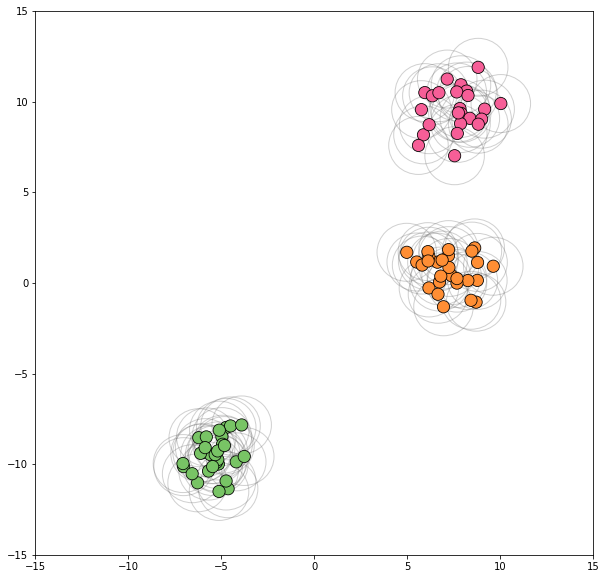

In [12]:
%matplotlib inline
import dbscan_lab_helper as helper

result = np.asarray(a)
helper.plot_clustered_dataset(dataset_1, result, neighborhood=True, epsilon=eps)

In [13]:
dataset_2 = pd.read_csv('varied.csv')[:300].values
m = np.asmatrix(dataset_2)
m = m.transpose()

In [14]:
eps = 1.3
min_points = 5
a = dbscan(m, eps, min_points)

[-10.455310047594793, -5.5083888282672255]
[1, 1, False, False, 1, False, False, False, False, False, 1, False, False, False, False, False, 1, 1, 1, False, False, False, 1, 1, 1, 1, 1, False, False, 1, False, 1, 1, 1, False, False, False, 1, False, False, False, False, 1, 1, False, False, 1, 1, False, False, False, 1, False, False, 1, False, 1, 1, False, False, False, False, False, False, False, False, False, False, 1, False, False, False, False, 1, False, False, False, False, False, False, False, False, False, False, False, False, 1, 1, False, False, False, False, False, 1, False, 1, False, False, 1, False, 1, False, False, 1, False, 1, False, 1, False, 1, False, 1, 1, 1, False, False, False, False, False, False, False, 1, 1, 1, False, 1, False, False, 1, False, False, False, 1, False, False, False, False, False, 1, False, False, False, False, False, False, 1, 1, 1, False, False, 1, False, False, False, False, False, False, 1, False, False, False, False, 1, False, False, False, False,

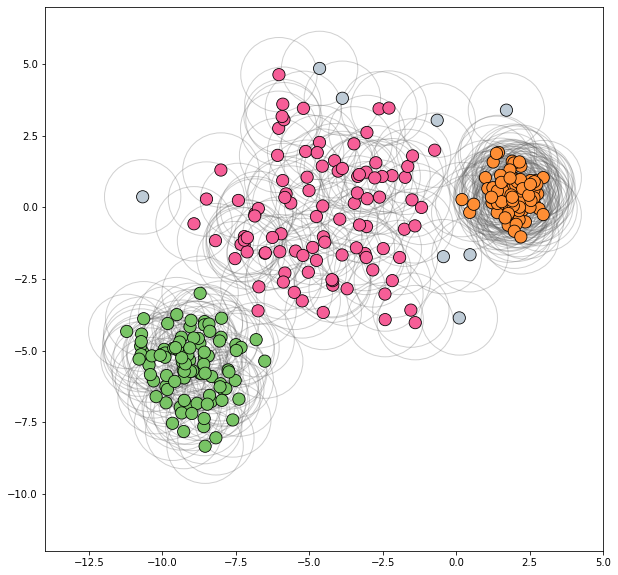

In [15]:
result = np.asarray(a)
helper.plot_clustered_dataset(dataset_2, result, xlim=(-14, 5), ylim=(-12, 7), neighborhood=True, epsilon=eps)
